# Stack Overflow Annual Developer Survey from 2019

## Import necessary libraries

In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set()
%matplotlib inline



## Get data

In [ ]:
df_2019 = pd.read_csv('./2019Survey/survey_results_public.csv')

# Data Exploration

In [479]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [480]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [368]:
df_2019['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Associate degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education', nan], dtype=object)

## Which is the better country for a SW-developer, UK, Germany or USA
* Salary overview for each location
* Salary development over experience 
* Jobsatisfaction over experience

### Select columns of interest

In [481]:
columns=['Respondent', 'Country', 'YearsCode', 'EdLevel', 'CareerSat', 'ConvertedComp']

In [482]:
df_2019=df_2019[columns].copy()

### Filter in column Country the three countries of interest (Germany, UK and US)

In [483]:
df_2019=df_2019[df_2019['Country'].isin(["Germany", "United Kingdom", "United States"])]

In [484]:
df_2019.Country.unique()

array(['United Kingdom', 'United States', 'Germany'], dtype=object)

### Clean data entries in column YearsCode and convert to numeric dtype

In [485]:
df_2019.loc[df_2019['YearsCode']=='Less than 1 year','YearsCode']=1

In [486]:
df_2019.loc[df_2019['YearsCode']=='More than 50 years','YearsCode']=50

In [490]:
df_2019[df_2019.YearsCode.isna()]

,Respondent,Country,YearsCode,EdLevel,CareerSat,ConvertedComp
224,226.0,United States,NaN,NaN,NaN,NaN
285,287.0,United Kingdom,NaN,NaN,Neither satisfied nor dissatisfied,NaN
1321,1327.0,United States,NaN,I never completed any formal education,Neither satisfied nor dissatisfied,NaN
2178,2186.0,United States,NaN,NaN,Neither satisfied nor dissatisfied,NaN
2796,2807.0,United Kingdom,NaN,NaN,Very satisfied,NaN
...,...,...,...,...,...,...
88636,47718.0,Germany,NaN,Associate degree,NaN,NaN
88668,53011.0,United States,NaN,"Other doctoral degree (Ph.D, Ed.D., etc.)",NaN,NaN
88718,61017.0,United States,NaN,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN
88797,74976.0,United States,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN


In [491]:
df_2019.dropna(subset=["YearsCode"], inplace=True)

In [492]:
df_2019.YearsCode.unique()

array(['4', '3', '17', '13', '10', '35', '12', '14', '30', '26', '40',
       '19', '5', '28', '15', '9', '22', '1', '16', '7', '11', '8', '20',
       '50', '41', '25', '23', '6', '2', '42', '18', '21', 1, '24', '39',
       '31', '38', '34', '33', '37', '32', '36', '29', '27', '45', '44',
       '43', 50, '47', '49', '46', '48'], dtype=object)

In [493]:
df_2019['YearsCode']=pd.to_numeric(df_2019['YearsCode'])

In [494]:
df_2019.YearsCode.unique()

array([ 4,  3, 17, 13, 10, 35, 12, 14, 30, 26, 40, 19,  5, 28, 15,  9, 22,
        1, 16,  7, 11,  8, 20, 50, 41, 25, 23,  6,  2, 42, 18, 21, 24, 39,
       31, 38, 34, 33, 37, 32, 36, 29, 27, 45, 44, 43, 47, 49, 46, 48],
      dtype=int64)

## Question 1: Salary overview for each location

In [511]:
df_2019_salary=df_2019[df_2019['ConvertedComp'].notnull()].copy()

In [363]:
df_2019_salary

,Respondent,Country,YearsCode,EdLevel,CareerSat,ConvertedComp
3,4.0,United States,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,61000.0
12,13.0,United States,17,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Very satisfied,90000.0
13,14.0,Germany,13,"Other doctoral degree (Ph.D, Ed.D., etc.)",Very satisfied,57060.0
15,16.0,United Kingdom,10,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Very satisfied,455352.0
21,22.0,United States,35,Some college/university study without earning ...,Slightly satisfied,103000.0
...,...,...,...,...,...,...
88315,88868.0,Germany,15,Some college/university study without earning ...,Slightly satisfied,797436.0
88321,88874.0,United States,7,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,2000000.0
88323,88876.0,United States,8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,180000.0
88324,88877.0,United States,31,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,2000000.0


### Dataset grouped by Country and the median of the different salaries is calculated

In [364]:
df_2019_salary_plot=df_2019_salary.groupby(['Country'])['ConvertedComp'].median().reset_index()

Text(0.5, 1.0, 'Median of Salaries by location')

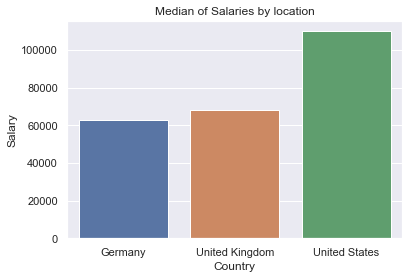

In [512]:
sns.barplot(x='Country', y='ConvertedComp', data=df_2019_salary_plot)
plt.ylabel('Salary')
plt.title('Median of Salaries by location')

### Let's look into it in more detail, is there a difference in salary between the education levels

In [385]:
df_2019_salary_academics=df_2019_salary.copy()

In [386]:
df_2019_salary_academics

,Respondent,Country,YearsCode,EdLevel,CareerSat,ConvertedComp
3,4.0,United States,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,61000.0
12,13.0,United States,17,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Very satisfied,90000.0
13,14.0,Germany,13,"Other doctoral degree (Ph.D, Ed.D., etc.)",Very satisfied,57060.0
15,16.0,United Kingdom,10,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Very satisfied,455352.0
21,22.0,United States,35,Some college/university study without earning ...,Slightly satisfied,103000.0
...,...,...,...,...,...,...
88315,88868.0,Germany,15,Some college/university study without earning ...,Slightly satisfied,797436.0
88321,88874.0,United States,7,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,2000000.0
88323,88876.0,United States,8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,180000.0
88324,88877.0,United States,31,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Very satisfied,2000000.0


### Data preparation

In [387]:
df_2019_salary_academics=df_2019_salary_academics[df_2019_salary_academics['EdLevel'].isin(["Bachelor’s degree (BA, BS, B.Eng., etc.)",
                                                                                           "Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"])]

### Calculating the median of the salaries for each education level in every country

In [388]:
df_2019_salary_academics_plot=df_2019_salary_academics.groupby(['Country', 'EdLevel'])['ConvertedComp'].median().reset_index()

In [389]:
df_2019_salary_academics_plot

,Country,EdLevel,ConvertedComp
0,Germany,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61870.0
1,Germany,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",68745.0
2,Germany,"Other doctoral degree (Ph.D, Ed.D., etc.)",80202.0
3,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",66092.5
4,United Kingdom,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",73274.0
5,United Kingdom,"Other doctoral degree (Ph.D, Ed.D., etc.)",78508.0
6,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",110000.0
7,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",125000.0
8,United States,"Other doctoral degree (Ph.D, Ed.D., etc.)",140000.0


Text(0.5, 1.0, 'Median of Salaries by location and education level')

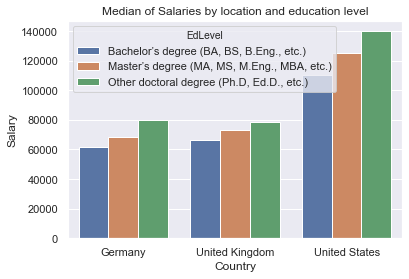

In [515]:
sns.barplot(x='Country', y='ConvertedComp', hue='EdLevel', data=df_2019_salary_academics_plot)
plt.ylabel('Salary')
plt.title('Median of Salaries by location and education level')

## Question 2: Salary development over experience

### Data preparation

In [391]:
df_2019_salary_development=df_2019_salary.copy()

In [392]:
df_2019_salary_development.dropna(subset=["YearsCode"], inplace=True)

### Calculate the median of the salaries over experience

In [393]:
df_2019_salary_development=df_2019_salary_development.groupby(['Country', 'YearsCode'])['ConvertedComp'].median().reset_index()

In [418]:
df_2019_salary_development_uk=df_2019_salary_development[df_2019_salary_development['Country']=='United Kingdom'].copy()
df_2019_salary_development_uk['pctChange']=df_2019_salary_development_uk['ConvertedComp'].pct_change().cumsum()

In [419]:
df_2019_salary_development_us=df_2019_salary_development[df_2019_salary_development['Country']=='United States'].copy()
df_2019_salary_development_us['pctChange']=df_2019_salary_development_us['ConvertedComp'].pct_change().cumsum()

In [420]:
df_2019_salary_development_de=df_2019_salary_development[df_2019_salary_development['Country']=='Germany'].copy()
df_2019_salary_development_de['pctChange']=df_2019_salary_development_de['ConvertedComp'].pct_change().cumsum()

In [421]:
df_2019_salary_development_all=pd.concat([df_2019_salary_development_uk, df_2019_salary_development_us, df_2019_salary_development_de])

In [422]:
df_2019_salary_development_all.dropna(subset=["pctChange"], inplace=True)

In [521]:
df_2019_salary_development_all=df_2019_salary_development_all[df_2019_salary_development_all['YearsCode']<35]

In [417]:
df_2019_salary_development_all.describe()

,YearsCode,ConvertedComp,pctChange
count,144.000000,144.000000,144.000000
mean,25.562500,101229.909722,0.079238
std,14.004854,78411.515851,0.572427
min,2.000000,39254.000000,-0.722222
25%,13.750000,72128.000000,-0.047621
50%,25.500000,88976.000000,0.012405
75%,37.250000,123500.000000,0.081557
max,50.000000,942096.000000,6.199982


Text(0.5, 0, 'Years of experience')

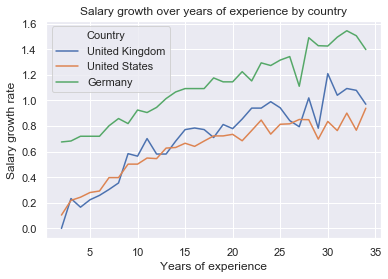

In [522]:
ax=sns.lineplot(x="YearsCode", y="pctChange", hue="Country", data=df_2019_salary_development_all)
plt.title('Salary growth over years of experience by country')
plt.ylabel('Salary growth rate')
plt.xlabel('Years of experience')

## Question 3: Jobsatisfaction over experience

### Data preparation

In [502]:
df_2019_satisfacation=df_2019.copy()

In [503]:
df_2019_satisfacation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32323 entries, 0 to 88877
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent     32323 non-null  float64
 1   Country        32323 non-null  object 
 2   YearsCode      32323 non-null  int64  
 3   EdLevel        31712 non-null  object 
 4   CareerSat      27591 non-null  object 
 5   ConvertedComp  22757 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [504]:
df_2019_satisfacation=df_2019_satisfacation[['YearsCode', 'CareerSat', 'Country']]

In [505]:
df_2019_satisfacation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32323 entries, 0 to 88877
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearsCode  32323 non-null  int64 
 1   CareerSat  27591 non-null  object
 2   Country    32323 non-null  object
dtypes: int64(1), object(2)
memory usage: 1010.1+ KB


In [506]:
df_2019_satisfacation.dropna(subset=["CareerSat"], inplace=True)

In [507]:
CareerSat_map={'Very satisfied':5,
              'Slightly satisfied':4,
              'Neither satisfied nor dissatisfied':3,
              'Slightly dissatisfied':2,
              'Very dissatisfied':1}
df_2019_satisfacation['CareerSat']=df_2019_satisfacation['CareerSat'].apply(lambda x: CareerSat_map[x])

In [508]:
df_2019_satisfacation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27591 entries, 3 to 88327
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearsCode  27591 non-null  int64 
 1   CareerSat  27591 non-null  int64 
 2   Country    27591 non-null  object
dtypes: int64(2), object(1)
memory usage: 862.2+ KB


In [518]:
df_2019_satisfacation=df_2019_satisfacation[df_2019_satisfacation['YearsCode']<35]

In [519]:
df_2019_satisfacation=df_2019_satisfacation.groupby(['Country', 'YearsCode'])['CareerSat'].median().reset_index()

Text(0.5, 1.0, 'Median of Jobsatisfaction by location and job experience')

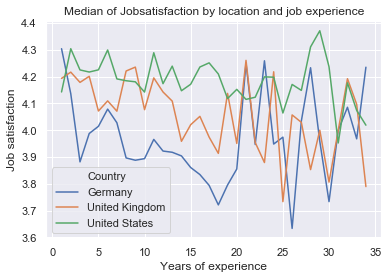

In [520]:
sns.lineplot(x="YearsCode", y="CareerSat", hue="Country", data=df_2019_satisfacation)
plt.xlabel('Years of experience')
plt.ylabel('Job satisfaction')
plt.title('Median of Jobsatisfaction by location and job experience')